### FORECASTING YIELD DATA

In [1]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [2]:
data = pd.read_csv('J:/USA_yield prediction/forecast/merged_5years.csv')


In [3]:
X = data.drop('yield', axis=1)
y = data['yield']


In [4]:
data.head()

,yield,NDVI,EVI,precipitation,temperature max,temperature min,water vapor,LST,sur_refl_b01,sur_refl_b02,sur_refl_b03,sur_refl_b04,sur_refl_b05,sur_refl_b06,sur_refl_b07
0,3.409575,0.815353,0.628178,0.925658,34.583486,23.448216,2853.764632,304.118133,0.046682,0.430018,0.023854,0.061851,0.361445,0.217832,0.092014
1,3.375950,0.758362,0.550394,1.010794,34.549401,22.831003,2757.128531,305.431402,0.058857,0.402964,0.031310,0.070104,0.365529,0.239996,0.110745
2,3.476825,0.748539,0.541425,1.471705,34.430056,22.861371,2786.922475,305.290717,0.054874,0.381923,0.029312,0.066946,0.336745,0.219102,0.097957
3,3.268350,0.806208,0.632744,1.888469,35.179973,22.799933,2148.359161,304.111328,0.106896,0.319811,0.054260,0.098525,0.355824,0.306452,0.197176
4,1.970425,0.542735,0.386820,1.105969,38.383882,23.784855,1359.217382,311.059895,0.097684,0.306928,0.047284,0.084225,0.331133,0.288004,0.191727


In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=500)

In [6]:
rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)

RandomForestRegressor()

In [7]:
y_pred = rf_model.predict(X_test)

In [21]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import numpy as np

# Calculate R-squared (R2)
r2 = r2_score(y_test, y_pred)
print("R-squared (R2):", r2)

# Calculate root mean squared error (RMSE)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error (RMSE):", rmse)

# Calculate mean absolute error (MAE)
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error (MAE):", mae)

# Calculate mean squared error (MSE)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE):", mse)

# Calculate normalized root mean squared error (NRMSE)
nrmse = rmse / (np.max(y_test) - np.min(y_test))
nrmse *= 100  # Convert to percentage
print("Normalized Root Mean Squared Error (NRMSE):", nrmse, "%")


R-squared (R2): 0.7675258024973064
Root Mean Squared Error (RMSE): 0.3363980418542059
Mean Absolute Error (MAE): 0.2611930844907408
Mean Squared Error (MSE): 0.11316364256334406
Normalized Root Mean Squared Error (NRMSE): 7.902371826005998 %


In [22]:
future_data = pd.read_csv('J:/USA_yield prediction/forecast/2021/2021without_yield.csv')


In [23]:
future_yield = rf_model.predict(future_data)
print('Forecasted Yield for the Next Year:', future_yield)



Forecasted Yield for the Next Year: [3.19390425 3.2015035  3.338021   3.2055385  2.73189675 3.0844885
 3.15463025 2.9351935  3.02456875 2.35516225 2.89477625 3.0608165
 2.82093575 3.1243005  2.55207025 2.47715375 2.72544075 3.16148975
 3.08630425 3.1842875  2.46249325 3.10621025 2.64339575 2.930755
 2.6314925  3.24299675 3.664856   3.6779025  3.764655   3.84132
 4.02645925 3.659745   4.20722725 4.16364925 4.094718   3.98718525
 3.94643175 2.36551875 4.03721925 3.98624375 4.1300915  4.14091875
 3.54521825 3.94791125 3.582273   3.79592625 3.33607075 3.68899875
 3.7362755  3.91374825 3.77709625 3.2501925  3.882208   3.7112585
 3.7752805  3.62376625 3.23976875 3.692294   3.240105   3.65349075
 3.7626375  3.851542   3.765193   2.52880175 3.650599   3.54333525
 3.96553075 4.09330575 3.9826795  3.83372075 3.917716   3.71536075
 3.532239   4.19310475 3.82914775 3.827332   4.126998   3.91980075
 4.00614975 3.662435   3.93392325 3.56485525 3.5232275  3.42672375
 3.73567025 3.766807   3.9869835  

C:\Users\okt\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- b1mean
- b1sr
- b2mean
- b2sr
- b3mean
- ...
Feature names seen at fit time, yet now missing:
- EVI
- NDVI
- precipitation
- sur_refl_b01
- sur_refl_b02
- ...

  warnings.warn(message, FutureWarning)


In [24]:
# Assuming 'future_yield' contains the forecasted yield values
df_forecast = pd.DataFrame({'Yield': future_yield})

# Specify the file path where you want to save the CSV file
file_path = 'J:/USA_yield prediction/forecast/2021/2021y.csv'

# Save the forecasted results to the specified file path
df_forecast.to_csv(file_path, index=False)

In [25]:
obs= pd.read_csv('J:/USA_yield prediction/forecast/2021/2021obs.csv')
pred = pd.read_csv('J:/USA_yield prediction/forecast/2021/2021y.csv')

In [26]:
prediction = pd.read_csv('J:/USA_yield prediction/forecast/2021/2021pred.csv')


In [27]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1000)


In [29]:
# Create the Random Forest model
model = RandomForestRegressor()

# Train the model
model.fit(X_train, y_train)


RandomForestRegressor()

In [30]:
# Forecast using the trained model
y_pred = model.predict(X_test)

In [31]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
# Calculate MSE
mse = mean_squared_error(y_test, y_pred)
# Calculate RMSE
rmse = np.sqrt(mse)
# Calculate MAE (Mean Absolute Error)
mae = mean_absolute_error(y_test, y_pred)
# Calculate R-squared
r2 = r2_score(y_test, y_pred)
# Calculate NRMSE%
nrmse_percentage = (rmse / (y_test.max() - y_test.min())) * 100

print("MSE:", mse)
print("RMSE:", rmse)
print("MAE:", mae)
print("R-squared:", r2)
print("NRMSE%:", nrmse_percentage)

MSE: 0.11261329338266096
RMSE: 0.33557904193000637
MAE: 0.26314761545138887
R-squared: 0.7686563951614118
NRMSE%: 7.8831325881946785


In [32]:
import matplotlib.pyplot as plt
from sklearn import linear_model
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor


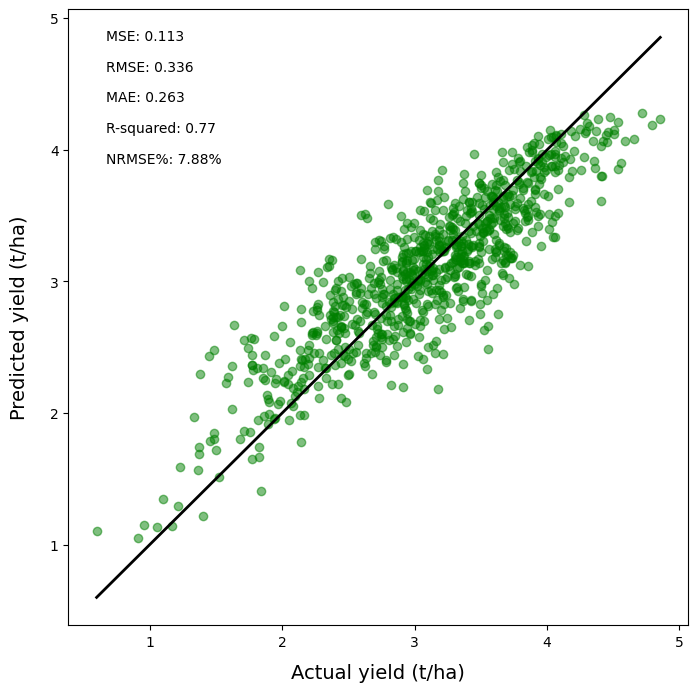

In [33]:
# Create scatter plot
plt.figure(figsize=(8, 8))
plt.scatter(y_test, y_pred, c='green', alpha=0.5)
plt.plot([np.min(y_test), np.max(y_test)], [np.min(y_test), np.max(y_test)], c='black', linestyle='-',linewidth= 2)
plt.xticks([1,2, 3, 4,5])
plt.yticks([1,2, 3, 4,5])
# Add labels and title
plt.xlabel('Actual yield (t/ha)',fontsize=14)
plt.ylabel('Predicted yield (t/ha)',fontsize=14)
# Adjust the position of x-axis label
plt.xlabel('Actual yield (t/ha)', labelpad=10)
# Adjust the position of y-axis label
plt.ylabel('Predicted yield (t/ha)', labelpad=15)
# Add metrics annotations
plt.annotate(f'MSE: {mse:.3f}', xy=(0.06, 0.95), xycoords='axes fraction')
plt.annotate(f'RMSE: {rmse:.3f}', xy=(0.06, 0.90), xycoords='axes fraction')
plt.annotate(f'MAE: {mae:.3f}', xy=(0.06, 0.85), xycoords='axes fraction')
plt.annotate(f'R-squared: {r2:.2f}', xy=(0.06, 0.80), xycoords='axes fraction')
plt.annotate (f'NRMSE%: {nrmse_percentage:.2f}%',xy=(0.06, 0.75), xycoords='axes fraction')
plt.show()